"""<br>
@Author: Prayag Bhoir<br>
@Date: 03-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 03-10-2024<br>
@Title : Python programs on Logistic Regression to predict whether a person makes over 50K a 
year or not <br>
"""

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pylab as plt

<h2>Load the dataset </h2>

In [112]:
url = 'https://drive.google.com/uc?id=1XVi34snXnh6qW2u71jwc05oCRnpOXoWF'
df = pd.read_csv(url,names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"])
#check the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [115]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

<h2>Visualize the data</h2>

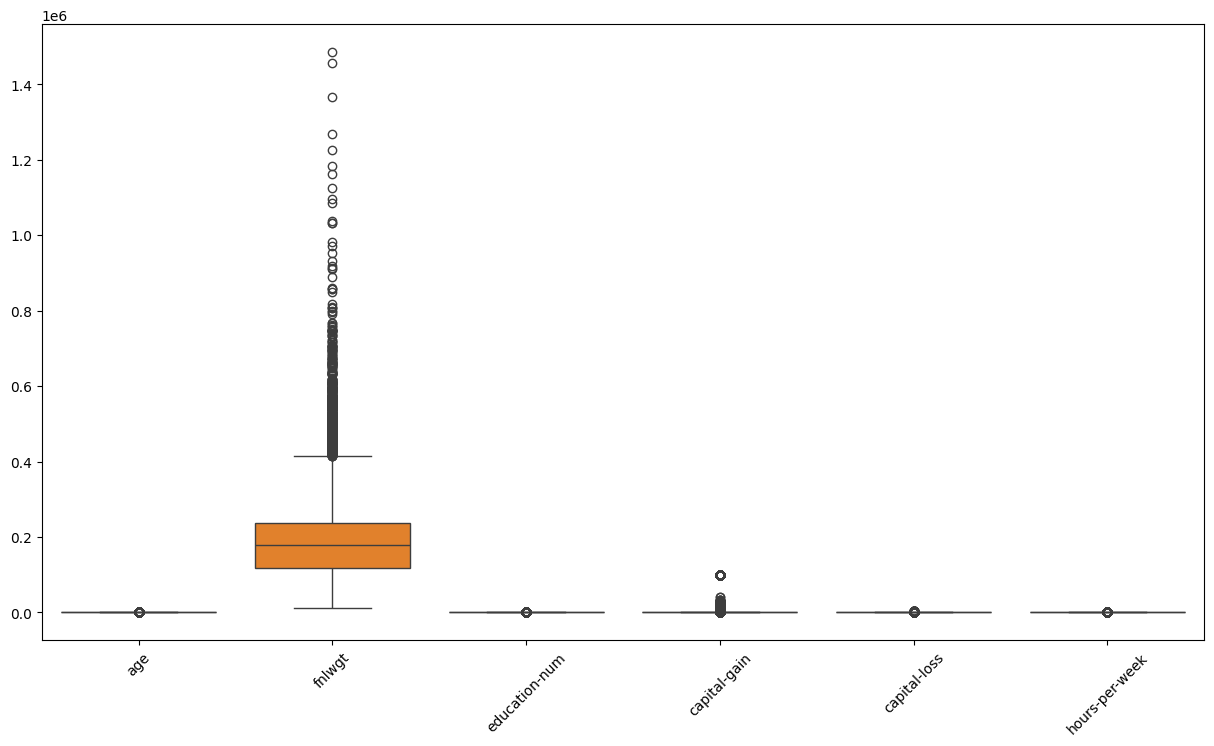

In [116]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<Axes: >

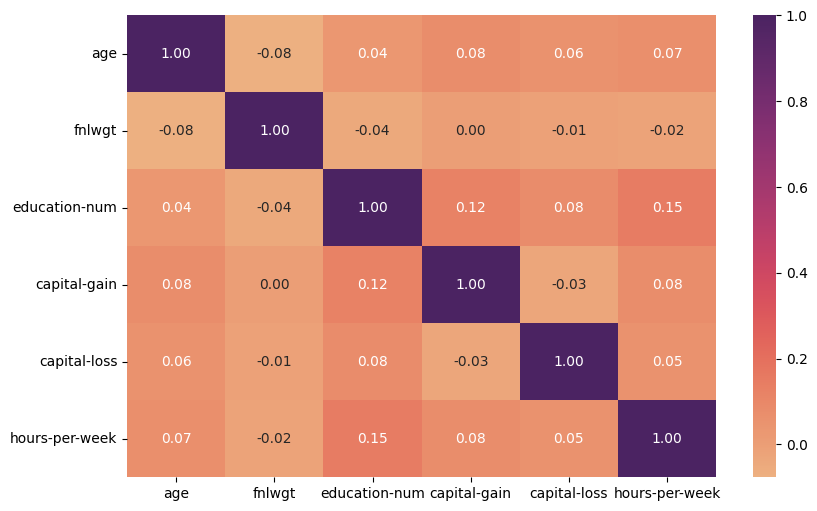

In [138]:
plt.figure(figsize=(9.5,6))
# For numerical value data
sns.heatmap(df[df.describe().columns].corr(), annot=True, fmt='.2f', cmap='flare')

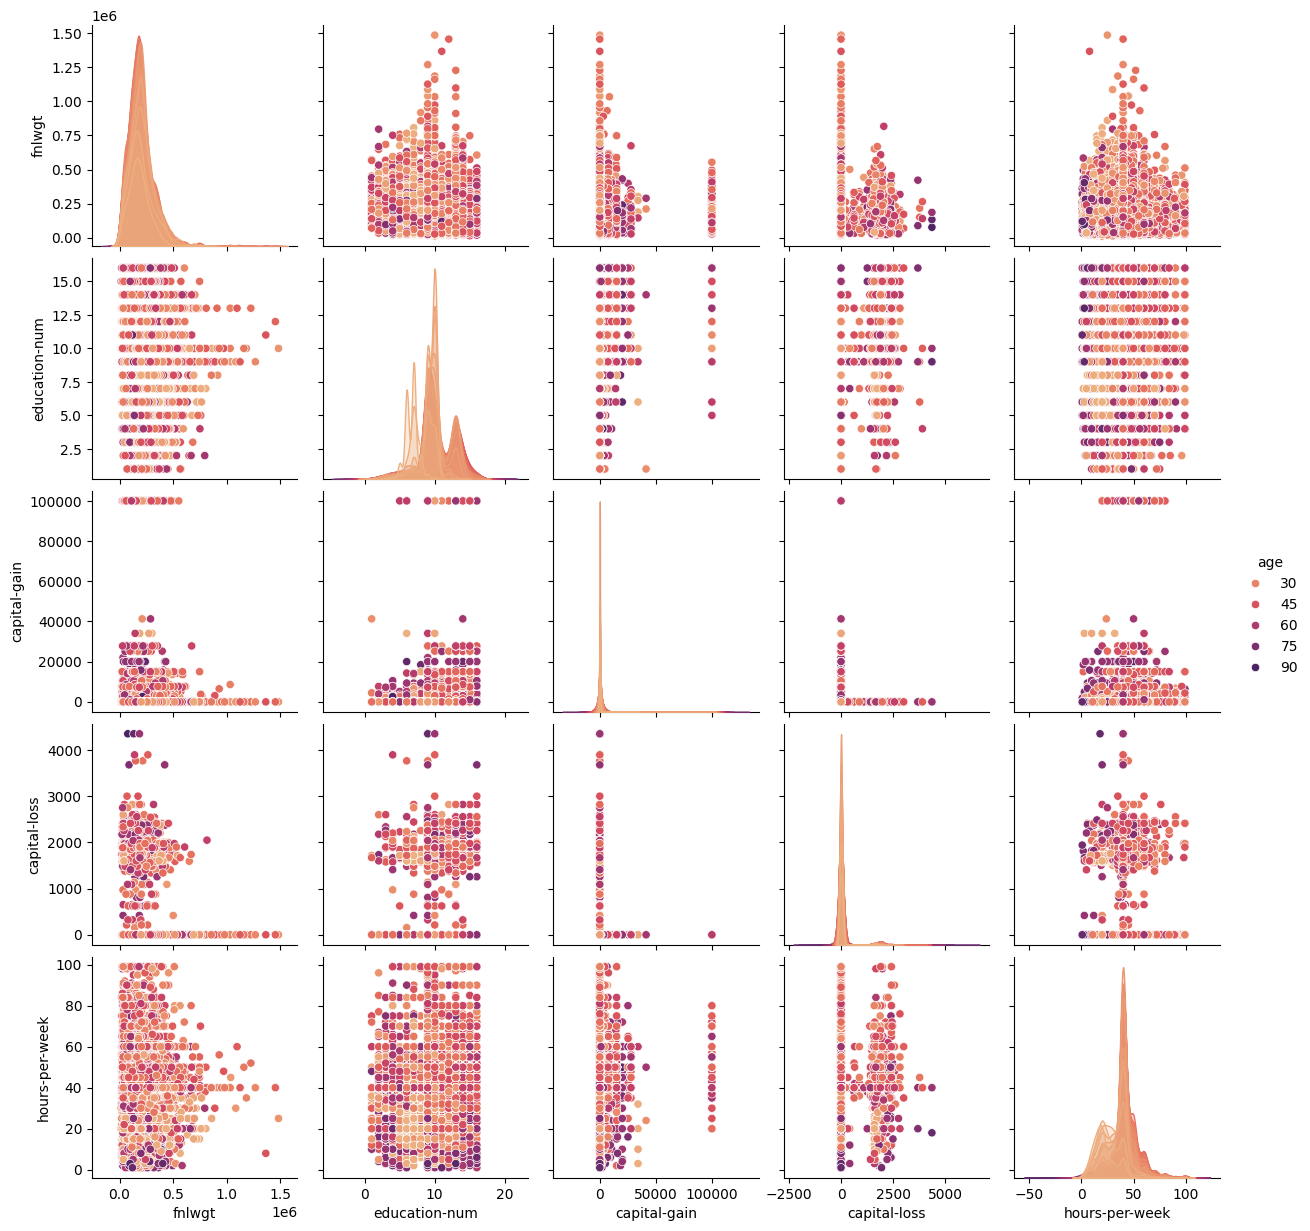

In [139]:
sns.pairplot(data=df[df.describe().columns], hue = 'age', palette = 'flare')

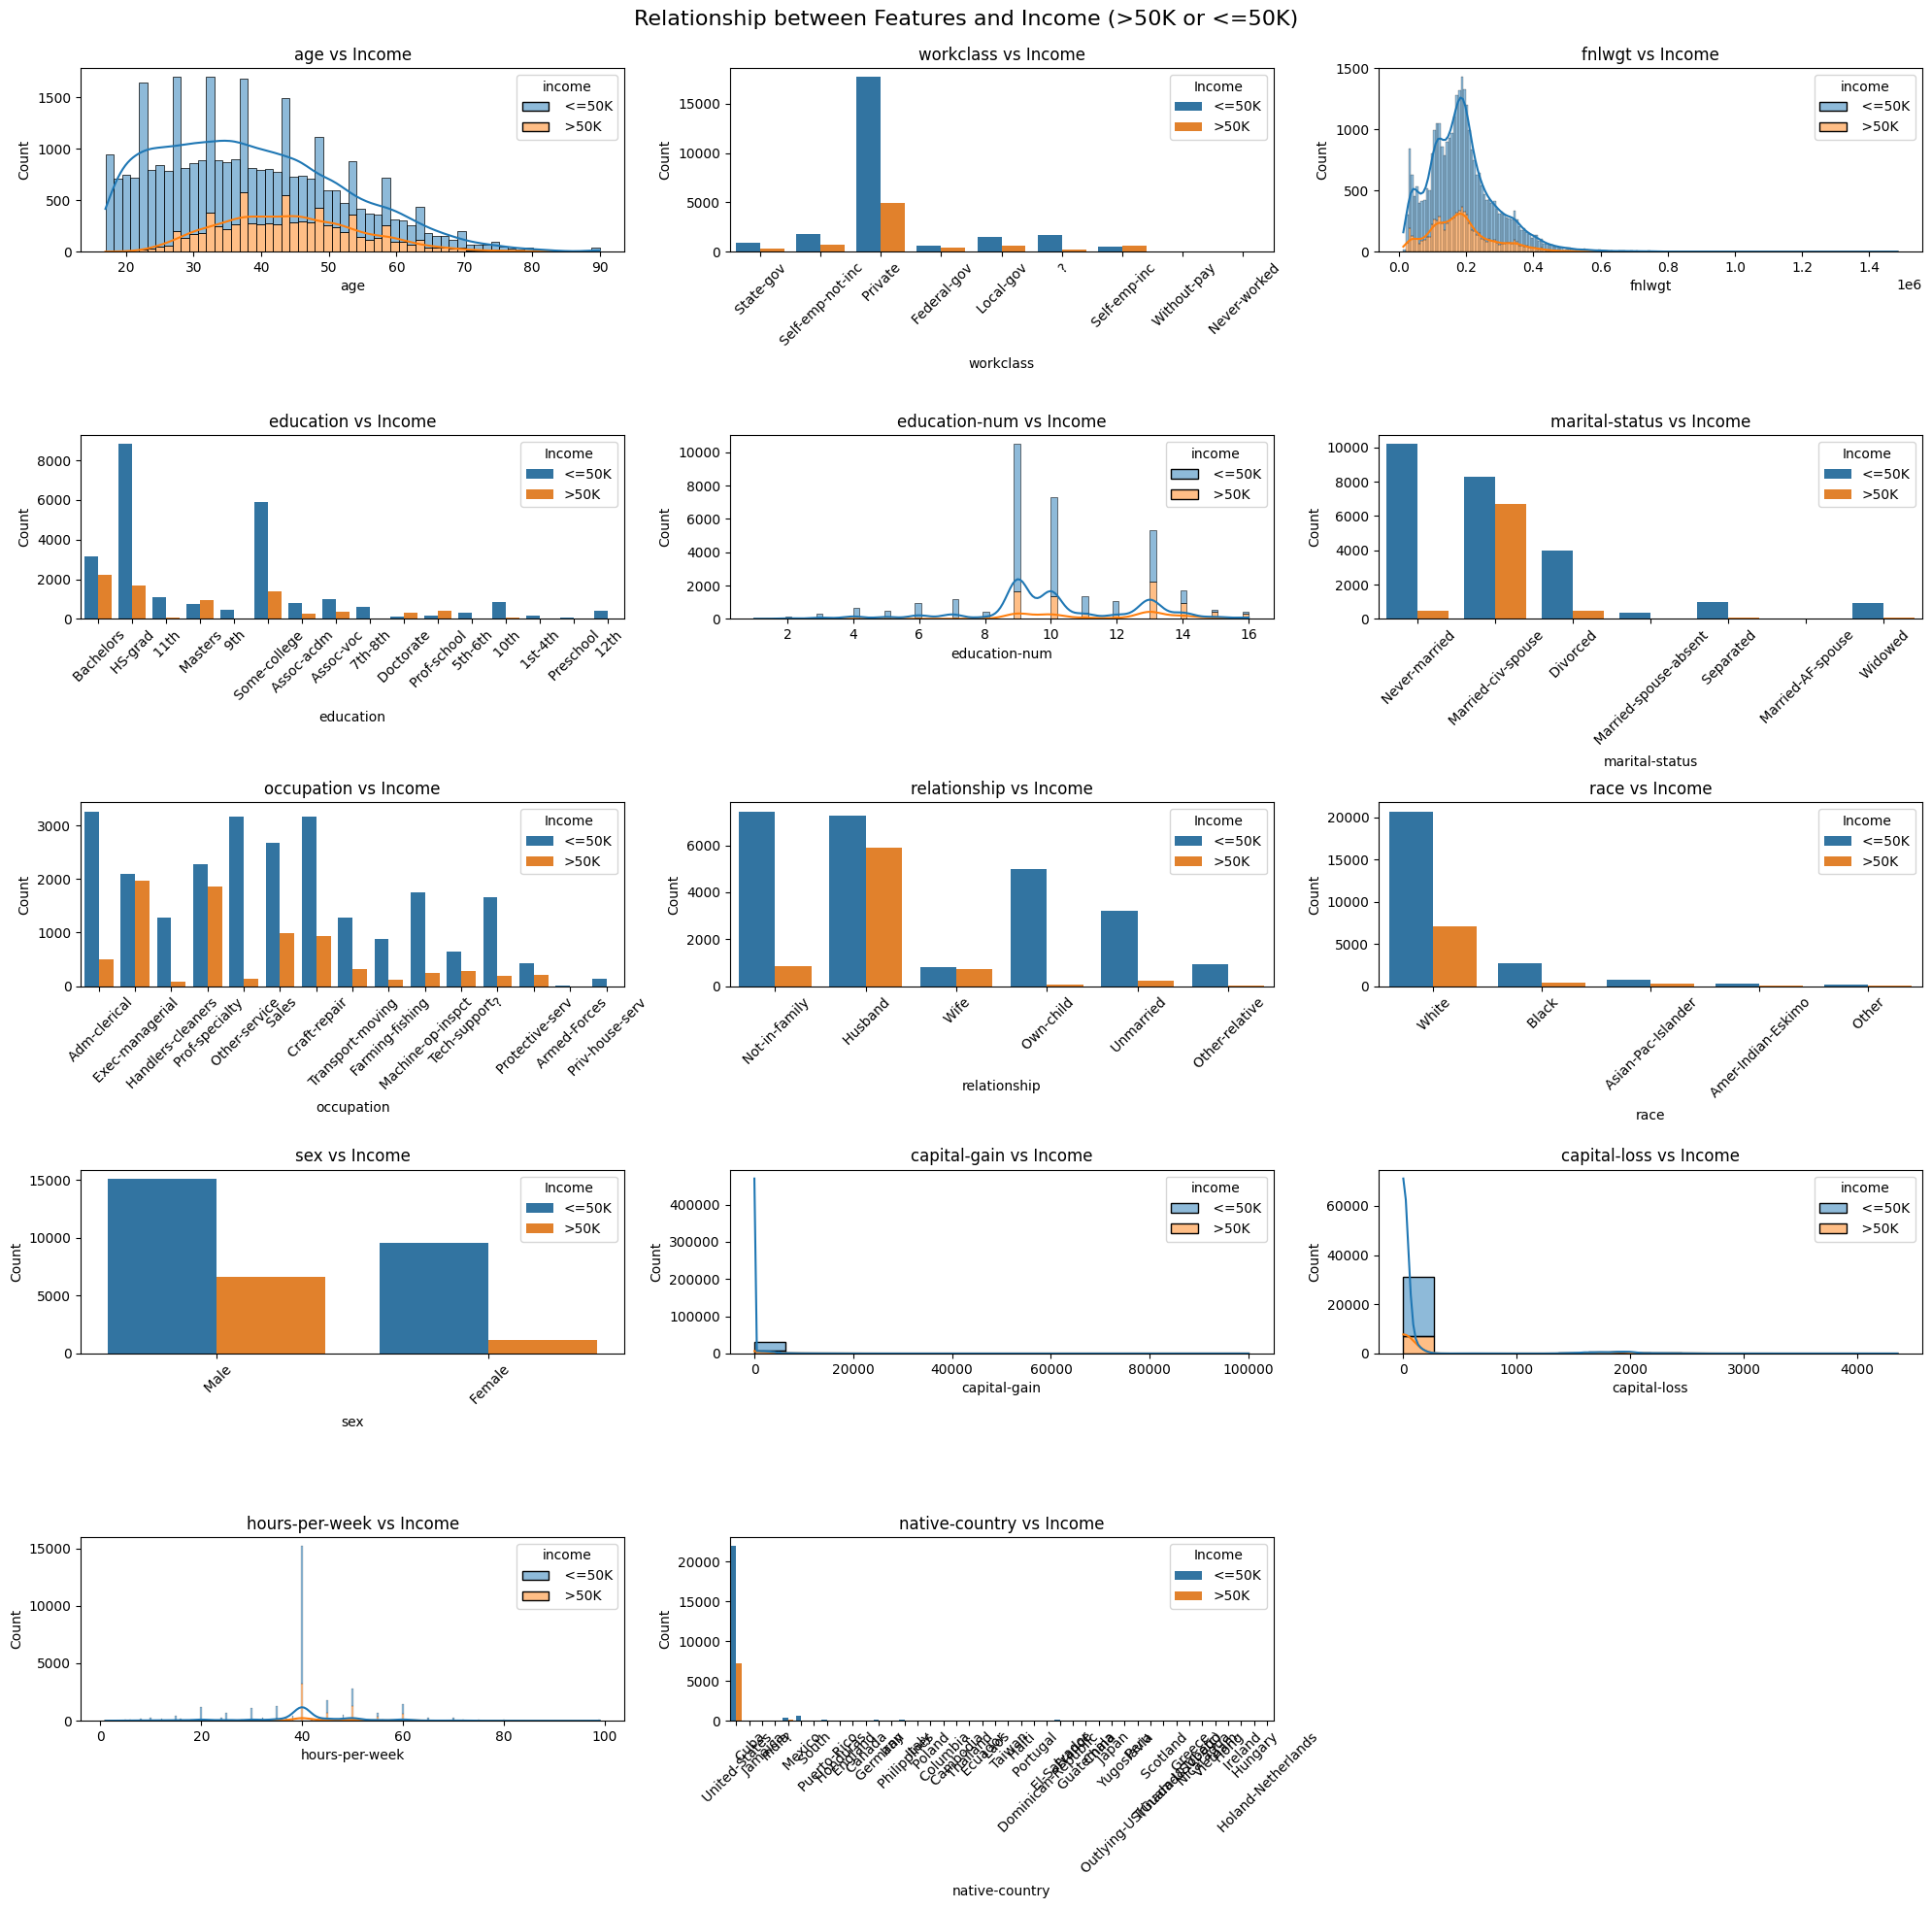

In [119]:
# List of columns (all features excluding the target 'income')
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country']

# Create subplots: Adjust number of columns in the plot grid
n_cols = 3  # 3 plots per row
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)  # Calculate required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust figure size
fig.suptitle('Relationship between Features and Income (>50K or <=50K)', fontsize=16)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through each column and create plots
for i, col in enumerate(columns):
    # Check if the column is categorical or numerical
    if df[col].dtype == 'object' or len(df[col].unique()) < 10:  # Categorical feature
        sns.countplot(data=df, x=col, hue='income', ax=axes[i])
        axes[i].set_title(f'{col} vs Income')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].legend(title='Income', labels=['<=50K', '>50K'])
        axes[i].tick_params(axis='x', rotation=45)
    else:  # Numerical feature
        sns.histplot(data=df, x=col, hue='income', ax=axes[i], kde=True, multiple="stack")
        axes[i].set_title(f'{col} vs Income')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')

# Remove extra empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top space for title
plt.show()

<h2>Preprocess the data</h2>

In [120]:
def remove_outliers_iqr(dataframe):
    """
    Description:
      This function removes the outliers using IQR

    Parameters:
      dataframe(pd.df): The dataframe to clean

    Returns:
      dataframe(pd.df): The dataframe after cleaning
    """
    # Define numerical columns to consider for outlier removal
    numerical_cols = df.describe().columns
    
    for col in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    
    return dataframe

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df)

# Check the shape of the DataFrame before and after outlier removal
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)


Original shape: (32561, 15)
Cleaned shape: (19004, 15)


In [121]:
# Run multiple times to further remove the outliers, but it can lead to data loss if you run to much times.
df_cleaned = remove_outliers_iqr(df_cleaned)

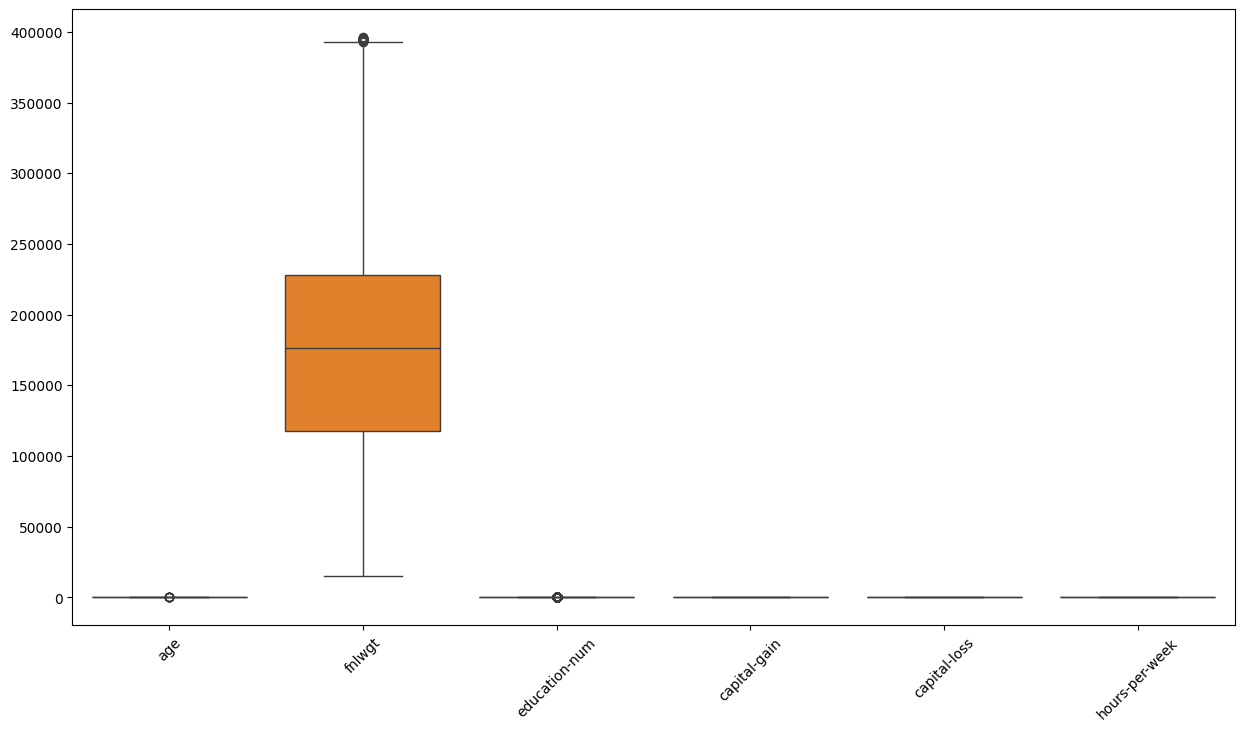

In [122]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [123]:
# Check the shapes 
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (32561, 15)
Cleaned shape: (12272, 15)


In [124]:
label_encoder = LabelEncoder()

In [125]:
# Encode categorical variables
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Encode target variable (income)
df_cleaned['income'] = label_encoder.fit_transform(df_cleaned['income'])  # Assuming <=50K becomes 0, >50K becomes 1


In [126]:
# Check data
df_cleaned.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38,4,215646,8,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,6,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,9,14,2,4,5,4,0,0,0,40,38,0
11,30,7,141297,6,13,2,10,0,1,1,0,0,40,18,1


In [127]:
df_cleaned.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.000000,12272.0,12272.0,12272.0,12272.000000,12272.000000
mean,37.843709,3.785447,179510.784306,7.465205,10.071952,2.577412,6.197686,1.496822,3.593465,0.657595,0.0,0.0,40.0,35.836864,0.180329
std,12.132483,1.386751,84638.903196,2.839170,2.083449,1.533811,4.184390,1.611372,0.922416,0.474534,0.0,0.0,0.0,7.575795,0.384477
min,17.000000,0.000000,14878.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,40.0,0.000000,0.000000
25%,28.000000,4.000000,117579.000000,6.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.0,0.0,40.0,38.000000,0.000000
50%,36.000000,4.000000,176577.000000,8.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.0,0.0,40.0,38.000000,0.000000
75%,46.000000,4.000000,227803.500000,9.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.0,0.0,40.0,38.000000,0.000000
max,75.000000,8.000000,396116.000000,11.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,0.0,0.0,40.0,40.000000,1.000000


<h2>Saperate the features</h2>


In [128]:
X = df_cleaned.drop('income', axis=1)
y = df_cleaned['income']
#Check the data
X.head(),y.head()

(    age  workclass  fnlwgt  education  education-num  marital-status  \
 2    38          4  215646          8              9               0   
 3    53          4  234721          1              7               2   
 4    28          4  338409          6             13               2   
 5    37          4  284582          9             14               2   
 11   30          7  141297          6             13               2   
 
     occupation  relationship  race  sex  capital-gain  capital-loss  \
 2            6             1     4    1             0             0   
 3            6             0     2    1             0             0   
 4           10             5     2    0             0             0   
 5            4             5     4    0             0             0   
 11          10             0     1    1             0             0   
 
     hours-per-week  native-country  
 2               40              38  
 3               40              38  
 4          

<h2>Split the dataset into training and testing</h2>


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
display(X_test)
display(y_test)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29708,30,4,36383,6,13,2,12,0,4,1,0,0,40,25
21736,29,4,184078,8,9,4,8,2,4,0,0,0,40,38
4321,32,4,80058,8,9,2,1,0,4,1,0,0,40,38
7025,21,4,255685,11,10,4,8,3,2,1,0,0,40,27
12980,43,4,269015,8,9,2,7,0,2,1,0,0,40,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10467,63,4,298113,11,10,0,8,1,4,1,0,0,40,38
29267,42,6,248406,8,9,2,14,0,4,1,0,0,40,38
12821,50,4,222020,8,9,2,3,0,4,1,0,0,40,38
25636,35,0,195946,11,10,2,0,0,1,1,0,0,40,29


29708    1
21736    0
4321     0
7025     0
12980    1
        ..
10467    0
29267    0
12821    0
25636    1
17232    0
Name: income, Length: 2455, dtype: int64

<h2>Build the model</h2>

In [131]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h2>Make prediction on test data.</h2>

In [132]:
y_pred = model.predict(X_test)

<h2>Evaluating the model</h2>

In [133]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [134]:
print(f"The accuracy is :{accuracy}\n{conf_matrix} \n{class_report}")

The accuracy is :0.8167006109979633
[[1995   11]
 [ 439   10]] 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2006
           1       0.48      0.02      0.04       449

    accuracy                           0.82      2455
   macro avg       0.65      0.51      0.47      2455
weighted avg       0.76      0.82      0.74      2455



<h2>Check the prediction<h2>

In [137]:
# Convert predictions 
predicted_labels = ['>50k' if pred == 1 else '<=50k' for pred in y_pred]

# Create a DataFrame to show actual vs predicted
predictions_df = pd.DataFrame({'Actual': y_test.map({0: '<=50k', 1: '>50k'}), 'Predicted': predicted_labels})

# Display the last few predictions
print(predictions_df.tail(15))

      Actual Predicted
23762  <=50k     <=50k
1472   <=50k     <=50k
14536  <=50k     <=50k
28984  <=50k     <=50k
24368  <=50k     <=50k
8023    >50k     <=50k
27242  <=50k     <=50k
14427   >50k     <=50k
7014   <=50k     <=50k
15763  <=50k     <=50k
10467  <=50k      >50k
29267  <=50k     <=50k
12821  <=50k     <=50k
25636   >50k     <=50k
17232  <=50k     <=50k


<h2>Model Tuning (Optional)</h2>

In [135]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs'],  # Other solvers can be explored
    'multi_class': ['auto']
}

# Perform Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy with best model:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report with best model:\n", classification_report(y_test, y_pred_best))


C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Use

Best parameters:  {'C': 0.1, 'multi_class': 'auto', 'solver': 'lbfgs'}
Accuracy with best model: 0.8297352342158859

Classification Report with best model:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2006
           1       0.61      0.18      0.28       449

    accuracy                           0.83      2455
   macro avg       0.73      0.58      0.59      2455
weighted avg       0.80      0.83      0.79      2455



C:\Users\bhoir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
